In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
df.shape

(10000, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
# dropping irrelevent features

df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Encoding Categorical Data

In [22]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [26]:
df = pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [32]:
df['Geography_Germany'].replace({False:0,True:1},inplace=True)
df['Geography_Spain'].replace({False:0,True:1},inplace=True)
df['Gender_Male'].replace({False:0,True:1},inplace=True)

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [38]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [40]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

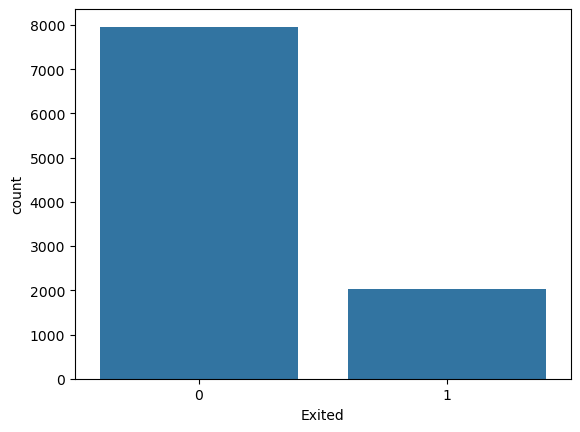

In [41]:
sns.countplot(data=df,x=df['Exited'])

In [44]:
X = df.drop(['Exited'],axis=1)

y = df['Exited']

In [46]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### Handling Imbalanced Data with SMOTE (Synthetic Minority Oversampling TEchnique)

In [51]:
from imblearn.over_sampling import SMOTE

In [53]:
X_new, y_new = SMOTE().fit_resample(X,y)

In [55]:
X.shape, y.shape, X_new.shape, y_new.shape

((10000, 11), (10000,), (15926, 11), (15926,))

In [57]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [59]:
y_new.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [61]:
# splitting the data into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((12740, 11), (3186, 11), (12740,), (3186,))

In [65]:
y_train.value_counts()

Exited
1    6410
0    6330
Name: count, dtype: int64

In [67]:
y_test.value_counts()

Exited
0    1633
1    1553
Name: count, dtype: int64

In [69]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
X_train

array([[ 1.67475397, -1.50932748,  0.4450931 , ..., -0.57179114,
        -0.46225545, -0.84401753],
       [ 1.09653593,  0.09706608, -1.38645926, ..., -0.57179114,
        -0.46225545,  1.18480951],
       [ 0.58377654,  0.79986326,  1.17771405, ..., -0.57179114,
        -0.46225545, -0.84401753],
       ...,
       [ 0.20193444,  0.19746568,  1.17771405, ..., -0.57179114,
        -0.46225545,  1.18480951],
       [-0.91086254,  1.00066246,  1.17771405, ...,  1.74889033,
        -0.46225545,  1.18480951],
       [ 0.52922767,  1.00066246, -1.38645926, ...,  1.74889033,
        -0.46225545,  1.18480951]])

### 1. Logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred_lr = lr_model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(y_test,y_pred_lr)

0.7837413684871312

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [84]:
as_lr = accuracy_score(y_test,y_pred_lr)
ps_lr = precision_score(y_test,y_pred_lr)
rs_lr = recall_score(y_test,y_pred_lr)
f1_lr = f1_score(y_test,y_pred_lr)

In [86]:
print('Accuracy Score using Logistic Regression:',as_lr)

print('Precision Score using Logistic Regression:',ps_lr)

print('Recall Score using Logistic Regression:',rs_lr)

print('F1 Score using Logistic Regression:',f1_lr)


Accuracy Score using Logistic Regression: 0.7837413684871312
Precision Score using Logistic Regression: 0.7720403022670025
Recall Score using Logistic Regression: 0.789439793947199
F1 Score using Logistic Regression: 0.7806431072906718


### 2. Support Vector Classifier (SVC) Model

In [89]:
from sklearn import svm

In [91]:
svc_model = svm.SVC()
svc_model.fit(X_train, y_train)

SVC()

In [92]:
y_pred_svc = svc_model.predict(X_test)

In [93]:
as_svc = accuracy_score(y_test,y_pred_svc)
ps_svc = precision_score(y_test,y_pred_svc)
rs_svc = recall_score(y_test,y_pred_svc)
f1_svc = f1_score(y_test,y_pred_svc)

In [97]:
print('Accuracy Score using SVC:',as_svc)

print('Precision Score using SVC:',ps_svc)

print('Recall Score using SVC:',rs_svc)

print('F1 Score using SVC:',f1_svc)

Accuracy Score using SVC: 0.8436911487758946
Precision Score using SVC: 0.8282514001244555
Recall Score using SVC: 0.8570508692852543
F1 Score using SVC: 0.8424050632911393


### 3. KNeighbors Classifier Model

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

In [104]:
as_knn = accuracy_score(y_test,y_pred_knn)
ps_knn = precision_score(y_test,y_pred_knn)
rs_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)

print('Accuracy Score using KNN:',as_knn)

print('Precision Score using KNN:',ps_knn)

print('Recall Score using KNN:',rs_knn)

print('F1 Score using KNN:',f1_knn)


Accuracy Score using KNN: 0.8217200251098556
Precision Score using KNN: 0.7986658580958157
Recall Score using KNN: 0.8480360592401803
F1 Score using KNN: 0.8226108682073704


### 4. Decision Tree Classifier Model

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model_tree = DecisionTreeClassifier()

model_tree.fit(X_train,y_train)

y_pred_tree = model_tree.predict(X_test)

In [111]:
as_tree = accuracy_score(y_test,y_pred_tree)
ps_tree = precision_score(y_test,y_pred_tree)
rs_tree = recall_score(y_test,y_pred_tree)
f1_tree = f1_score(y_test,y_pred_tree)

print('Accuracy Score using Decision Tree:',as_tree)

print('Precision Score using Decision Tree:',ps_tree)

print('Recall Score using Decision Tree:',rs_tree)

print('F1 Score using Decision Tree:',f1_tree)


Accuracy Score using Decision Tree: 0.7897049591964846
Precision Score using Decision Tree: 0.7700305810397553
Recall Score using Decision Tree: 0.810688989053445
F1 Score using Decision Tree: 0.7898368883312421


### 5. Random Forest Classifier Model

In [114]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

In [116]:
as_rf = accuracy_score(y_test,y_pred_rf)
ps_rf = precision_score(y_test,y_pred_rf)
rs_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)

print('Accuracy Score using Random Forest:',as_rf)

print('Precision Score using Random Forest:',ps_rf)

print('Recall Score using Random Forest:',rs_rf)

print('F1 Score using Random Forest:',f1_rf)

Accuracy Score using Random Forest: 0.8615819209039548
Precision Score using Random Forest: 0.8532401524777636
Recall Score using Random Forest: 0.8647778493238892
F1 Score using Random Forest: 0.8589702590342181


### 6. Gradient Boosting Classifier Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

model_gb.fit(X_train,y_train)

y_pred_gb = model_gb.predict(X_test)

In [ ]:
as_gb = accuracy_score(y_test,y_pred_gb)
ps_gb = precision_score(y_test,y_pred_gb)
rs_gb = recall_score(y_test,y_pred_gb)
f1_gb = f1_score(y_test,y_pred_gb)

print('Accuracy Score using Gradient Boosting:',as_gb)

print('Precision Score using Gradient Boosting:',ps_gb)

print('Recall Score using Gradient Boosting:',rs_gb)

print('F1 Score using Gradient Boosting:',f1_gb)

### 7. XGBoost Classifier Model

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()

model_xgb.fit(X_train,y_train)

y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
as_xgb = accuracy_score(y_test,y_pred_xgb)
ps_xgb = precision_score(y_test,y_pred_xgb)
rs_xgb = recall_score(y_test,y_pred_xgb)
f1_xgb = f1_score(y_test,y_pred_xgb)

print('Accuracy Score using XGBoost:',as_xgb)

print('Precision Score using XGBoost:',ps_xgb)

print('Recall Score using XGBoost:',rs_xgb)

print('F1 Score using XGBoost:',f1_xgb)

### Visualise all the Models

In [ ]:
model_df = pd.DataFrame(
    {'Models':
         ['Logistic Regression','Support Vector Classifier',
          'KNN', 'Decision Tree','Random Forest',
          'Gradient Boosting','XGBoost'],
     'Accuracy Score':
         [as_lr,as_svc,
          as_knn,as_tree,as_rf,
          as_gb, as_xgb],
     'Precision Score':
         [ps_lr,ps_svc,
          ps_knn,ps_tree,ps_rf,
          ps_gb, ps_xgb],
     'Recall Score':
         [rs_lr,rs_svc,
          rs_knn,rs_tree,rs_rf,
          rs_gb, rs_xgb],
     'F1 Score':
         [f1_lr,f1_svc,
          f1_knn,f1_tree,f1_rf,
          f1_gb, f1_xgb],
     
    })
                       
    

In [ ]:
model_df

In [ ]:
# Visualising F1 Score for each model

import matplotlib.pyplot as plt 

plt.figure(figsize=(6,6))
model_plot = sns.barplot(data=model_df,y=model_df['Models'],x=model_df['F1 Score'])

#### from the above Random Forest and XGBoost are 1st and 2nd best models with default parameters

#### now saved the Random Forest Modle for future use

In [ ]:
import joblib

In [ ]:
joblib.dump(model_rf,'churn_predict_model')